<h1>Kiva_Crowdfunding_Data_Wrangling<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-loans" data-toc-modified-id="The-loans-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The loans</a></span><ul class="toc-item"><li><span><a href="#Loans_Data-Description" data-toc-modified-id="Loans_Data-Description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loans_Data Description</a></span></li><li><span><a href="#Loans_Missing-Value" data-toc-modified-id="Loans_Missing-Value-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loans_Missing Value</a></span></li><li><span><a href="#Redundant-columns" data-toc-modified-id="Redundant-columns-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Redundant columns</a></span></li><li><span><a href="#Country-code" data-toc-modified-id="Country-code-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Country code</a></span><ul class="toc-item"><li><span><a href="#Country-code_missing-value" data-toc-modified-id="Country-code_missing-value-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Country code_missing value</a></span></li><li><span><a href="#Convert-2-letter-country_code-to-3-letter-Country-ISO-Code" data-toc-modified-id="Convert-2-letter-country_code-to-3-letter-Country-ISO-Code-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Convert 2-letter country_code to 3-letter Country ISO Code</a></span></li></ul></li><li><span><a href="#Posted-time-and-funded-time" data-toc-modified-id="Posted-time-and-funded-time-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Posted time and funded time</a></span><ul class="toc-item"><li><span><a href="#Convert-to-datetime" data-toc-modified-id="Convert-to-datetime-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Convert to datetime</a></span></li><li><span><a href="#funded-time_missing-value" data-toc-modified-id="funded-time_missing-value-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>funded time_missing value</a></span></li><li><span><a href="#Combine-the-result-of-the-process-above-to-the-main-dataset" data-toc-modified-id="Combine-the-result-of-the-process-above-to-the-main-dataset-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Combine the result of the process above to the main dataset</a></span></li></ul></li><li><span><a href="#Borrowers-gender" data-toc-modified-id="Borrowers-gender-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Borrowers gender</a></span><ul class="toc-item"><li><span><a href="#Borrowers-gender_missing-value" data-toc-modified-id="Borrowers-gender_missing-value-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Borrowers gender_missing value</a></span></li><li><span><a href="#Classify-borrowers-gender" data-toc-modified-id="Classify-borrowers-gender-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Classify borrowers gender</a></span></li></ul></li><li><span><a href="#Tags-of-the-loans" data-toc-modified-id="Tags-of-the-loans-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Tags of the loans</a></span><ul class="toc-item"><li><span><a href="#Tags_missing-value" data-toc-modified-id="Tags_missing-value-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Tags_missing value</a></span></li><li><span><a href="#Duplicated-tags" data-toc-modified-id="Duplicated-tags-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Duplicated tags</a></span></li></ul></li><li><span><a href="#Loans_Summary" data-toc-modified-id="Loans_Summary-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Loans_Summary</a></span></li></ul></li><li><span><a href="#MPI-by-the-location-of-region" data-toc-modified-id="MPI-by-the-location-of-region-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MPI by the location of region</a></span><ul class="toc-item"><li><span><a href="#MPI_Data-Description" data-toc-modified-id="MPI_Data-Description-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>MPI_Data Description</a></span></li><li><span><a href="#MPI_Missing-value" data-toc-modified-id="MPI_Missing-value-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>MPI_Missing value</a></span></li><li><span><a href="#Latitude-and-longitude" data-toc-modified-id="Latitude-and-longitude-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Latitude and longitude</a></span></li><li><span><a href="#MPI_Summary" data-toc-modified-id="MPI_Summary-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>MPI_Summary</a></span></li></ul></li><li><span><a href="#Loan-themes" data-toc-modified-id="Loan-themes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loan themes</a></span><ul class="toc-item"><li><span><a href="#Loan-themes_Data-Description" data-toc-modified-id="Loan-themes_Data-Description-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Loan themes_Data Description</a></span></li><li><span><a href="#themes_Missing-value" data-toc-modified-id="themes_Missing-value-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>themes_Missing value</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
import missingno as msno
import seaborn as sns

In [94]:
# Import Data sets
loans = pd.read_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/RawData/KivaData/kiva_loans.csv')
mpi_region_locations = pd.read_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/RawData/KivaData/kiva_mpi_region_locations.csv')


## The loans

### Loans_Data Description

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

* Columns descriptions
    * id: Unique ID for loan

    * funded_amount: Dollar value of loan funded on Kiva.org

    * loan_amount: Total dollar amount of loan

    * activity: Loan activity type

    * sector: Sector of loan activity as shown to lenders

    * use: text description of how loan will be used

    * country_code: 2-letter Country ISO Code

    * country: country name

    * region: name of location within country

    * currency: currency in which loan is disbursed

    * partner_id: Unique ID for field partners

    * posted_time: date and time when loan was posted on kiva.org

    * disbursed_time: date and time that the borrower received the loan

    * funded_time: date and time at which loan was fully funded on kiva.org

    * term_in_months: number of months over which loan was scheduled to be paid back
    
    * lender_count: number of lenders contributing to loan

    * tags: tags visible to lenders describing loan type

    * borrower_genders: gender of borrower(s)

    * repayment_interval: frequency at which lenders are scheduled to receive installments

    * date: date on which loan was posted

In [4]:
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [5]:
loans.tail()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26
671204,1340339,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:31:46+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


### Loans_Missing Value

In [6]:
# Check missing values
def missing_vals(data_):
    miss_     = data_.isnull().sum()
    miss_pct  = data_.isnull().sum()/data_.shape[0]
    
    miss_pct  = pd.concat([miss_, miss_pct], axis =1)
    miss_pct.reset_index(inplace=True)
    miss_cols = miss_pct.rename(columns={'index':'Column Name', 0:'Missings', 1:'Missing_pct'})
    
    miss_cols = miss_cols[miss_cols.iloc[:,1]!=0].sort_values('Missing_pct', ascending=False).round(2)
    miss_cols.reset_index(inplace=True, drop=True)
    
    return miss_cols

miss_loans = missing_vals(loans)
miss_loans

,Column Name,Missings,Missing_pct
0,tags,171416,0.26
1,region,56800,0.08
2,funded_time,48331,0.07
3,partner_id,13507,0.02
4,use,4232,0.01
5,borrower_genders,4221,0.01
6,disbursed_time,2396,0.00
7,country_code,8,0.00


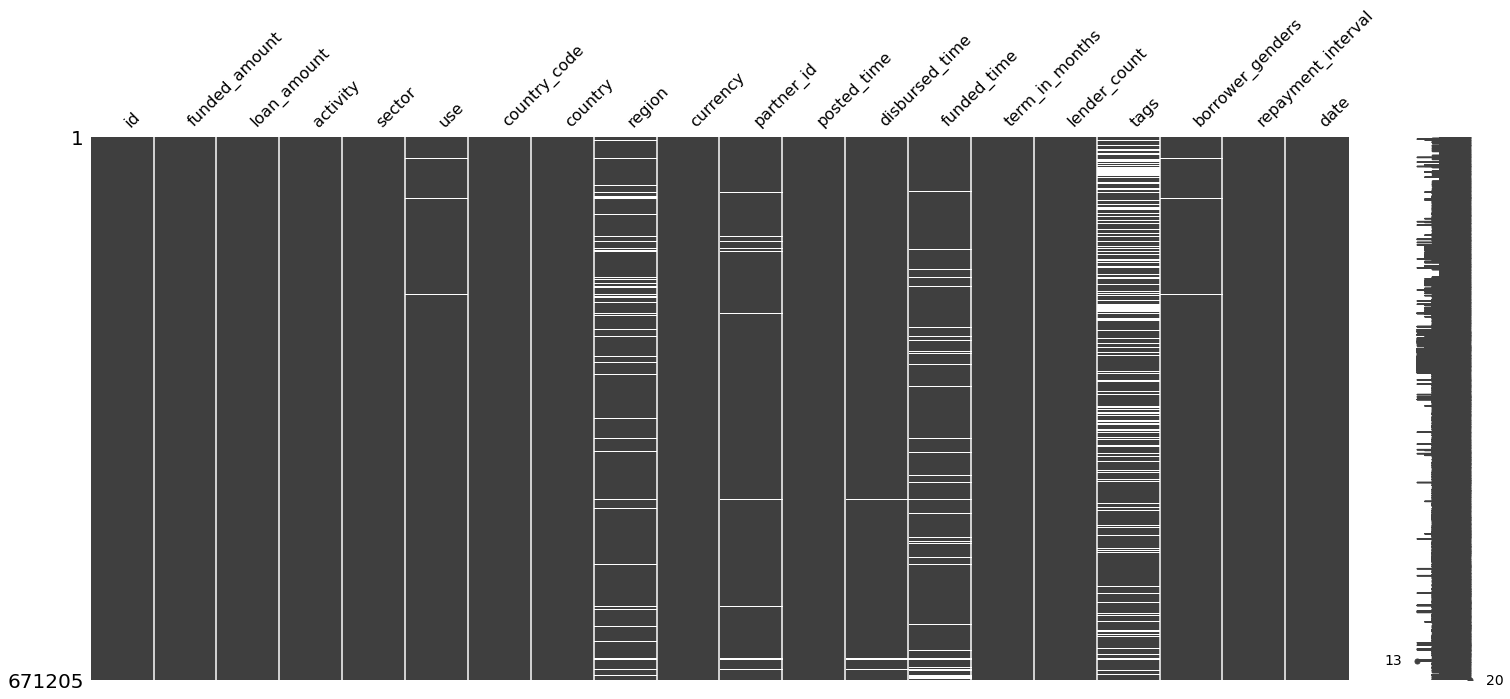

In [7]:
# Check missing values' destription
_ = msno.matrix(loans)

The dataset seems clean except the top three factors; Missing values distribute randomly:
* `tags` provide some interesting information about the special loans such as 'user favorite', 'women-owned business', and so on. **It will be kept temporally just in case.**
* `rigion` is important for localization, which **will be handled together with other data sets**.
* `funded-time` is the time at which the loan posted to Kiva gets funded by lenders completely. The missing values can be explained in different ways. **It will be kept temporally just in case.**

### Redundant columns
According to the column description, `disbursed_date`, `date`, and `currency` are redundant or not related to the project closely, which will be removed.

In [8]:
loans_dropped = loans.drop(['disbursed_time', 'date', 'currency'], axis=1)
loans_dropped.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'partner_id', 'posted_time',
       'funded_time', 'term_in_months', 'lender_count', 'tags',
       'borrower_genders', 'repayment_interval'],
      dtype='object')

### Country code

There are two issues of the `country_code`:
* There are 8 missing values
* In the `loans` dataset, `country_code` is a two-letter code, which dose not match the three-letter ISO code in  `mpi_region_locations` dataset.

`loans` and `mpi_region_locations` datasets can be aligned on country name or country code. Country name is more describable, but I will keep both here just in case there are some non-matching of the country names in the different datasets, such as spelling, upper case and lower case, space, and so on. 

#### Country code_missing value

In [9]:
loans_dropped.country_code.isnull().sum()

8

In [10]:
loans_dropped[loans.country_code.isna()][['country']]

,country
202537,Namibia
202823,Namibia
344929,Namibia
351177,Namibia
420953,Namibia
421218,Namibia
487207,Namibia
487653,Namibia


All missing values of country_code come from Namibia whose ISO code is 'NA'([countrycode.org](https://countrycode.org/))

In [11]:
# Fill null value with 'NA'
loans_dropped.country_code.fillna('NA', inplace=True)

In [12]:
loans_dropped.country_code.isnull().sum()

0

#### Convert 2-letter country_code to 3-letter Country ISO Code

In [13]:
# Import ISO_country_code table
country_ISO = pd.read_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/RawData/AdditionalData/wikipedia-iso-country-codes.csv')

In [14]:
country_ISO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   English short name lower case  246 non-null    object
 1   Alpha-2 code                   245 non-null    object
 2   Alpha-3 code                   246 non-null    object
 3   Numeric code                   246 non-null    int64 
 4   ISO 3166-2                     246 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.7+ KB


In [15]:
country_ISO.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [16]:
# Keep code columns only and rename
ISO = country_ISO.iloc[:, 1:3]
ISO.rename({'Alpha-2 code':'country_code'}, axis=1, inplace=True)
ISO.head()

,country_code,Alpha-3 code
0,AF,AFG
1,AX,ALA
2,AL,ALB
3,DZ,DZA
4,AS,ASM


In [17]:
loans_ISO = pd.merge(loans_dropped, ISO, on=['country_code'], how='left')

To check the result

In [18]:
loans_ISO['Alpha-3 code'].isnull().sum()

1587

In [19]:
loans_ISO[loans_ISO['Alpha-3 code'].isnull()]['country'].unique()

array(['Kosovo', 'South Sudan', 'Namibia'], dtype=object)

According to [countrycode.org](https://countrycode.org/), the 3-letter ISO codes of Kosovo, South Sudan and Namibia are 'XKX, 'SSD' and 'NAM'， respectively.

In [20]:
# Fill Null values
d = {'Kosovo': "XKX", 'South Sudan':'SSD', 'Namibia':'NAM'}
s = loans_ISO.country.map(d)
loans_ISO['Alpha-3 code'] = loans_ISO['Alpha-3 code'].combine_first(s)

# Check result
loans_ISO['Alpha-3 code'].isnull().sum()

0

In [21]:
loans_ISO.insert(6, 'ISO', loans_ISO['Alpha-3 code'])
loans_ISO.drop(columns=['country_code','Alpha-3 code'],inplace=True)

In [22]:
loans_ISO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 671204
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   ISO                 671205 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  tags                499789 non-null  object 
 15  borrower_genders    666984 non-nul

### Posted time and funded time
The `posted_time` is the time at which the loan is posted on Kiva by the field agent; `funded_time` is the time when the loan posted to Kiva gets funded by lenders completely. From the two time, we can get the information about how long a loan gets the full fund on Kiva platform.

In [23]:
times = loans[['posted_time', 'funded_time']]

In [24]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   posted_time  671205 non-null  object
 1   funded_time  622874 non-null  object
dtypes: object(2)
memory usage: 10.2+ MB


In [25]:
times.head()

,posted_time,funded_time
0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00
1,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00
2,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00
3,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00
4,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00


#### Convert to datetime

In [26]:
# Parese string to datetime
times_parsed = times.applymap(lambda x: dt.strptime(x,'%Y-%m-%d %H:%M:%S%z'),na_action='ignore')
times_parsed.head()

,posted_time,funded_time
0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00
1,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00
2,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00
3,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00
4,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00


#### funded time_missing value

In [27]:
(times_parsed.funded_time.isnull()).sum()

48331

In [28]:
# Set posted_time as index
times_parsed_index = times_parsed.set_index('posted_time',drop=False)

In [29]:
# Resample the time by month and calculate the number of loans
time_monthly_count = times_parsed_index.resample('M').count()
time_monthly_count.rename(columns={'posted_time': 'loans_posted','funded_time': 'loans_funded_completely'}, inplace=True)

# Add the posted/funded count ratio
time_monthly_count['ratio'] = round(time_monthly_count.loans_funded_completely / time_monthly_count.loans_posted, 2)

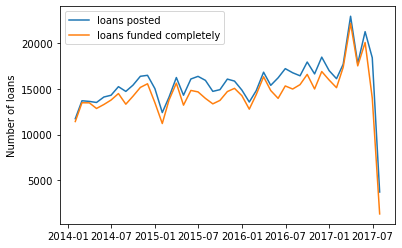

In [30]:
# The number of loans posted and of the number of loans completely funded month by month
_ = plt.plot(time_monthly_count[['loans_posted', 'loans_funded_completely']])
_ = plt.legend(['loans posted', 'loans funded completely'])
_ = plt.ylabel('Number of loans')

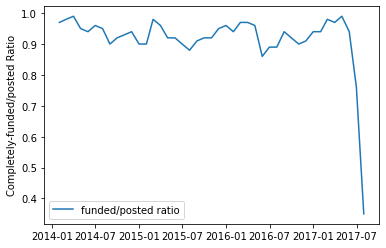

In [31]:
# The ratio of loans completely funded and loans posted month by month
_ = plt.plot(time_monthly_count.ratio, label='funded/posted ratio')
_ = plt.ylabel('Completely-funded/posted Ratio')
_ = plt.legend()

In [55]:
# Check the last few month
time_monthly_count.tail(10)

,loans_posted,loans_funded_completely,ratio
posted_time,,,
2016-10-31 00:00:00+00:00,16638,14988,0.90
2016-11-30 00:00:00+00:00,18474,16899,0.91
2016-12-31 00:00:00+00:00,16997,15970,0.94
2017-01-31 00:00:00+00:00,16114,15129,0.94
2017-02-28 00:00:00+00:00,17695,17361,0.98
2017-03-31 00:00:00+00:00,22951,22171,0.97
2017-04-30 00:00:00+00:00,17766,17518,0.99
2017-05-31 00:00:00+00:00,21263,20076,0.94
2017-06-30 00:00:00+00:00,18407,13986,0.76


In [33]:
time_monthly_count.describe()

,loans_posted,loans_funded_completely,ratio
count,43.000000,43.000000,43.000000
mean,15609.418605,14485.441860,0.917907
std,2777.194115,2846.428893,0.097847
min,3706.000000,1309.000000,0.350000
25%,14512.000000,13482.500000,0.905000
50%,15930.000000,14485.000000,0.940000
75%,16701.000000,15392.000000,0.960000
max,22951.000000,22171.000000,0.990000


The completely-funded rate of the loans posted in 2017-07 is much lower than the other months. 2017-07 is the last month in the dataset, in which many loans posted had no enough time to be funded completely. The performance of 2017-06, the month before last, is also not as good as the previous months. 

Before handling the missing value in these two months, let's check the difference between the posted time and the funded time month by month.

In [45]:
# The date difference between posted time and funded time in the whole time period
posted_funded_diff_index = times_parsed_index.funded_time - times_parsed_index.posted_time
diff_days = posted_funded_diff_index.apply(lambda x: x.days)

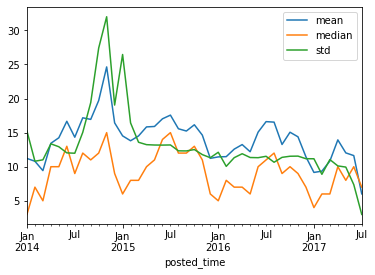

In [35]:
# Resample the time by month and check mean, median, and standard deviation
diff_by_month = diff_days.resample('M')

diff_median = diff_by_month.median()

diff_mean = diff_by_month.mean()

diff_std = diff_by_month.std()

diff_stat = pd.DataFrame({'mean': diff_mean, 'median': diff_median, 'std':diff_std})

_ = diff_stat.plot()

The distribution of the difference between posted time and funded time shows that:

* The mean and median of the difference changed month by month. 
* The standard deviation is pretty high in the second half of 2014, which impacted more on the mean value than the median. 
* The minimal standard deviation in the last two month resulted from the relatively few data points in that time.

Considering that the completely-funded rate is too low in the last month, 2017-7 will be drop. We will impute the missing value in all the previous months with the monthly median.

In [36]:
# Drop the last month
times_parsed.drop(times_parsed[(times_parsed.posted_time.dt.year==2017) & (times_parsed.posted_time.dt.month==7)].index, inplace=True)

In [37]:
# Add a monthly column
times_parsed['posted_time_m'] = times_parsed['posted_time'].dt.to_period('M')
times_parsed.tail()

/Users/lasayin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,posted_time,funded_time,posted_time_m
667494,2017-06-30 13:13:08+00:00,2017-07-01 19:46:07+00:00,2017-06
667495,2017-06-30 17:08:33+00:00,NaT,2017-06
667496,2017-06-30 01:56:16+00:00,NaT,2017-06
667497,2017-06-30 15:05:11+00:00,NaT,2017-06
667498,2017-06-30 16:35:00+00:00,2017-07-01 23:38:23+00:00,2017-06


In [38]:
# Fill the missing value in funded_time with the monthly median
func = (times_parsed.funded_time - times_parsed.posted_time).median() + times_parsed.posted_time
times_parsed.funded_time = times_parsed.groupby('posted_time_m').funded_time.transform(lambda x: x.fillna(func))
times_parsed.funded_time.isna().sum()

0

In [39]:
# Drop posted_time_m
times_parsed.drop(columns=['posted_time_m'], inplace=True)

In [40]:
# Convert the date and time to the date
times_parsed = times_parsed.applymap(lambda x: x.date())

#### Combine the result of the process above to the main dataset

In [43]:
last_index = times_parsed.index[-1]
loans_df = loans_ISO.iloc[:(last_index+1)].assign(posted_date=times_parsed.posted_time, funded_date=times_parsed.funded_time)
loans_df.drop(columns=['posted_time','funded_time'],inplace=True)
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667499 entries, 0 to 667498
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  667499 non-null  int64  
 1   funded_amount       667499 non-null  float64
 2   loan_amount         667499 non-null  float64
 3   activity            667499 non-null  object 
 4   sector              667499 non-null  object 
 5   use                 663272 non-null  object 
 6   ISO                 667499 non-null  object 
 7   country             667499 non-null  object 
 8   region              610938 non-null  object 
 9   partner_id          654017 non-null  float64
 10  term_in_months      667499 non-null  float64
 11  lender_count        667499 non-null  int64  
 12  tags                496651 non-null  object 
 13  borrower_genders    663283 non-null  object 
 14  repayment_interval  667499 non-null  object 
 15  posted_date         667499 non-nul

### Borrowers gender

#### Borrowers gender_missing value

In [56]:
loans_df.borrower_genders.isna().sum()

4216

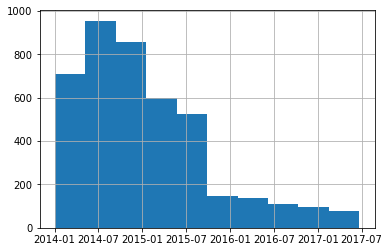

In [57]:
loans_df[loans_df.borrower_genders.isna()].posted_date.hist()

In [58]:
loans_df[loans_df.borrower_genders.isna()].country.value_counts()

Colombia         777
Kenya            707
El Salvador      554
Uganda           211
United States    160
                ... 
China              1
Bhutan             1
Chile              1
Kyrgyzstan         1
South Africa       1
Name: country, Length: 69, dtype: int64

Most of the missing values happens during 2014 and 2015, up to 69 countries involved. We will fill the missing value with 'unknown'.

In [59]:
loans_df.borrower_genders.fillna('unknown',inplace=True)

#### Classify borrowers gender

In [60]:
loans_df.borrower_genders.value_counts()

female                                                                                                                                                                                                                                                                                                                              424245
male                                                                                                                                                                                                                                                                                                                                133714
female, female                                                                                                                                                                                                                                                                                                                       12108
female,

The borrowers gender is composed of all the individual or individuals' gender involved in a loan, which includes single female, single male, female group, male group, and the group mixed with female and male. We will classify borrowers gender for simplicity:
* The female group will be labeled as 'female'
* The male group will be labeled as 'male'
* The group mixed with female and male will be labeled as 'mixed'

In [61]:
def genders(x): 
    # Classify borrowers gender
    if x == 'unknown':
        gender = 'unknown' 
    else:
        gender_list = [y.strip(' ') for y in x.split(',')]
        if 'female' not in gender_list:
            gender = 'male'
        elif 'male' not in gender_list:
            gender = 'female'
        else: gender = 'mixed'
            
    return gender
        
gender_group = loans_df.borrower_genders.apply(genders)

In [62]:
gender_group.value_counts()

female     485532
male       137505
mixed       40246
unknown      4216
Name: borrower_genders, dtype: int64

In [63]:
loans_df.borrower_genders = gender_group

### Tags of the loans

#### Tags_missing value

In [64]:
loans_df.tags.isna().sum()

170848

`tags` is used to annotate the particular loans such as woman owned business, or user favorite. We will fill the missing value with 'No_tag'

In [65]:
loans_df[loans_df.tags.notnull()].tags.str.contains('No_tag').sum()

0

In [66]:
# Fill missing values with 'No_tag'
loans_df.tags.fillna('No_tag', inplace=True)

#### Duplicated tags

In [67]:
loans.tags.value_counts()

user_favorite                                                                                                                                              27088
#Parent, #Woman Owned Biz                                                                                                                                  16597
#Woman Owned Biz                                                                                                                                           12557
#Parent                                                                                                                                                    11671
#Elderly                                                                                                                                                    6482
                                                                                                                                                           ...  
#Animals, #Biz Durable Asset, #Eco

In [68]:
len(loans.tags.unique())

86720

There are totally 86720 unique tags, among which some seems be duplicated, such as `user_favorite` and `user_favorite, user_favorite`, `#Parent, #Woman Owned Biz` and `#Woman Owned Biz, #Parent`. We will union the duplicated taps which are in the top 10 list.

In [69]:
loans_df.tags = loans_df.tags.str.replace('user_favorite, user_favorite', 'user_favorite')
loans_df.tags = loans_df.tags.str.replace('#Woman Owned Biz, #Parent', '#Parent, #Woman Owned Biz')

### Loans_Summary

In [70]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667499 entries, 0 to 667498
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  667499 non-null  int64  
 1   funded_amount       667499 non-null  float64
 2   loan_amount         667499 non-null  float64
 3   activity            667499 non-null  object 
 4   sector              667499 non-null  object 
 5   use                 663272 non-null  object 
 6   ISO                 667499 non-null  object 
 7   country             667499 non-null  object 
 8   region              610938 non-null  object 
 9   partner_id          654017 non-null  float64
 10  term_in_months      667499 non-null  float64
 11  lender_count        667499 non-null  int64  
 12  tags                667499 non-null  object 
 13  borrower_genders    667499 non-null  object 
 14  repayment_interval  667499 non-null  object 
 15  posted_date         667499 non-nul

In the `loans` dataset wrangling process, several main steps are taken as follows:
* Remove the columns of `disbursed_date`, `date` and `currency`, which are redundant or not related to the project closely.
* Convert 2-letter country code to 3-letter Country ISO Code to align with other datasets
* Convert posted time and funded time to datetime; drop all the loans' data which are posted in 2017-07; fill the missing value of funded time with median.
* Classify borrowers gender
* Fill tags missing value with 'No_tag'; name the duplicate tags uniformly

There are still missing value in several columns, which will be handled in EDA

## MPI by the location of region

### MPI_Data Description

In [71]:
mpi_region_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


* Column descriptions:

    * LocationName: "{region}, {country}" - Unique ID for region
    * ISO: Unique ID for country
    * country: country name
    * region: name of location within country
    * world_region: General global region
    * MPI: Multi-dimensional poverty index for this region
    * geo: Lat-Lon pair
    * lat: latitude
    * lon: longitude


### MPI_Missing value

In [72]:
def missing_vals(data_):
    # Check the number of missing values and the percentage
    miss_     = data_.isnull().sum()
    miss_pct  = data_.isnull().sum()/data_.shape[0]
    
    miss_pct  = pd.concat([miss_, miss_pct], axis =1)
    miss_pct.reset_index(inplace=True)
    miss_cols = miss_pct.rename(columns={'index':'Column Name', 0:'Missings', 1:'Missing_pct'})
    
    miss_cols = miss_cols[miss_cols.iloc[:,1]!=0].sort_values('Missing_pct', ascending=False).round(2)
    miss_cols.reset_index(inplace=True, drop=True)
    
    return miss_cols

miss_MPI = missing_vals(mpi_region_locations)
miss_MPI

,Column Name,Missings,Missing_pct
0,lat,1880,0.68
1,lon,1880,0.68
2,LocationName,1788,0.65
3,region,1788,0.65
4,MPI,1788,0.65
5,ISO,1764,0.64
6,country,1764,0.64
7,world_region,1764,0.64


It looks wild that all the factors except `geo` have very high missing value rate.

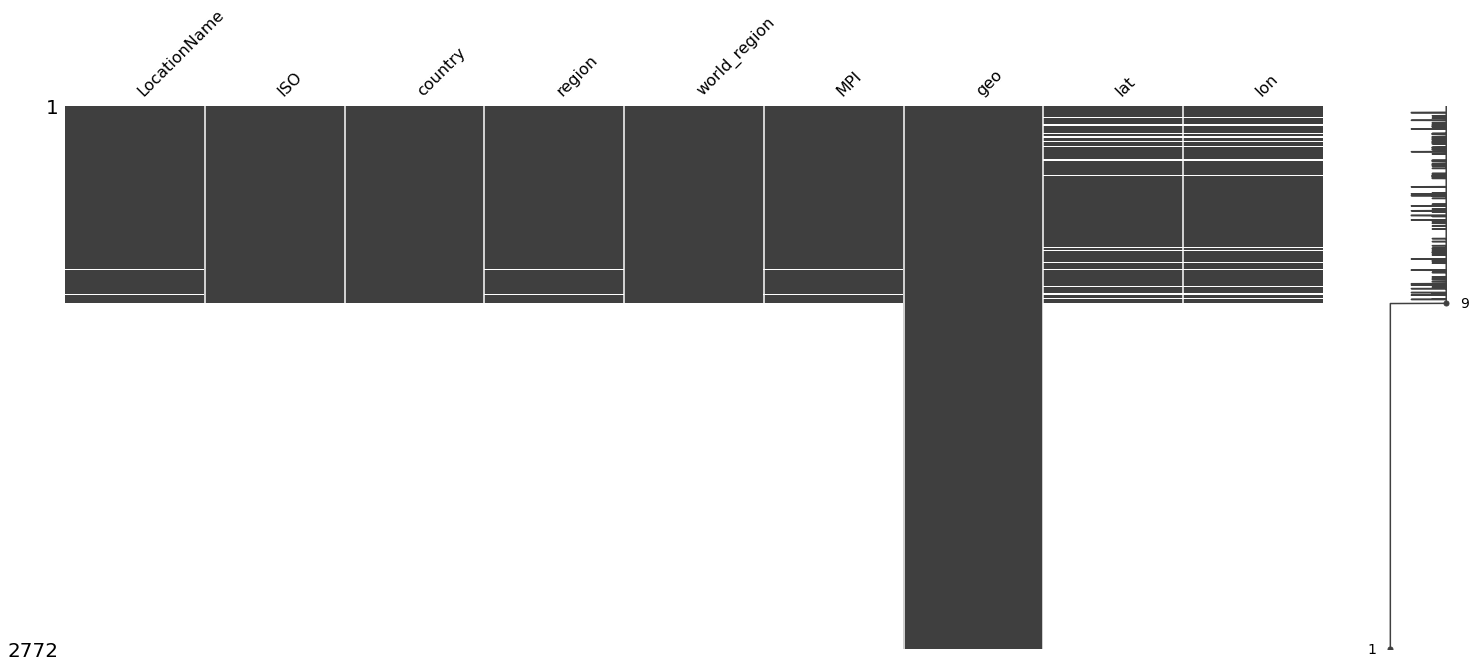

In [73]:
# Check missing value ditribution
_ = msno.matrix(mpi_region_locations)

The missing values' pattern shows:

* From a particular row on, all the columns expect `geo` are full-filled with missing values
* `LocationName`, `region`, and `MPI` have the same pattern, which makes sense because `LocationName` combines `country` and `region`, and `MPI` is region-level. 
* `lat` and `lon` also have the same pattern.

In [74]:
mpi_region_locations.country.last_valid_index()

1007

In [75]:
# Check the dataframe after the 1007th row
mpi_region_locations_1008 = mpi_region_locations.iloc[1008:, :]
mpi_region_locations_1008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 1008 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  0 non-null      object 
 1   ISO           0 non-null      object 
 2   country       0 non-null      object 
 3   region        0 non-null      object 
 4   world_region  0 non-null      object 
 5   MPI           0 non-null      float64
 6   geo           1764 non-null   object 
 7   lat           0 non-null      float64
 8   lon           0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 124.2+ KB


All the rows after the 1007th row are invalid, which will be dropped.

In [76]:
# Drop the rows from the 1007th to the end
mpi_region_locations_df = mpi_region_locations[:1008]
mpi_region_locations_df

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
...,...,...,...,...,...,...,...,...,...
1003,"Mashonaland West, Zimbabwe",ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.192,"(-17.4851029, 29.7889248)",-17.485103,29.788925
1004,"Masvingo, Zimbabwe",ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.174,"(-20.0791909, 30.8384093)",-20.079191,30.838409
1005,"Matabeleland North, Zimbabwe",ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.238,"(-18.5331566, 27.5495846)",-18.533157,27.549585
1006,"Matabeleland South, Zimbabwe",ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.164,"(-21.052337, 29.0459927)",-21.052337,29.045993


In [77]:
mpi_region_locations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           1008 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 71.0+ KB


### Latitude and longitude

In [78]:
# Check the missing value of Latitude based on geo column
geo_with_null_lat = mpi_region_locations_df[mpi_region_locations_df.lat.isna()].geo
geo_with_null_lat

34     (1000.0, 1000.0)
35     (1000.0, 1000.0)
36     (1000.0, 1000.0)
51     (1000.0, 1000.0)
63     (1000.0, 1000.0)
             ...       
958    (1000.0, 1000.0)
960    (1000.0, 1000.0)
965    (1000.0, 1000.0)
985    (1000.0, 1000.0)
987    (1000.0, 1000.0)
Name: geo, Length: 116, dtype: object

The geo info is invalid, which leads to the missing values of latitude and longitude

* Check the invalid geo distribution

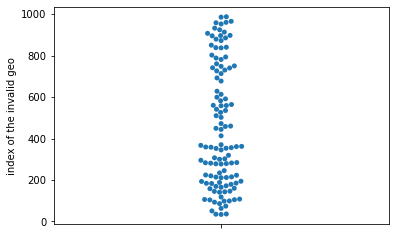

In [79]:
# Check the index of the invalid geo
_ = sns.swarmplot(geo_with_null_lat.index,orient='v')
_ = plt.ylabel('index of the invalid geo')

In [80]:
# Check the Location Name where the geo is invalid
mpi_region_locations_df[mpi_region_locations.geo=='(1000.0, 1000.0)'].LocationName.value_counts()

<ipython-input-80-a0dc1da38efe>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mpi_region_locations_df[mpi_region_locations.geo=='(1000.0, 1000.0)'].LocationName.value_counts()


Ngounið, Gabon                            1
Qonitara, Syrian Arab Republic            1
Western  Hill, Nepal                      1
Santa Bðrbara, Honduras                   1
Battambang & Pailin, Cambodia             1
                                         ..
Ogoouð-Ivindo, Gabon                      1
Huðnuco, Peru                             1
Sab, Guinea-Bissau                        1
Ouham-Pendð, Central African Republic     1
Nana-Mambðrð, Central African Republic    1
Name: LocationName, Length: 92, dtype: int64

The invalid geo info seems distribute randomly. Here, we will keep it temporally just in case that the additional datasets can modify it.

### MPI_Summary
The pattern of missing value is very clear; all the non-meaning rows are removed and the remained invalid geo data will be handled in EDA